In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from scipy import stats

In [25]:
df = pd.read_excel("/content/data.xlsx")
df


,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             3998 non-null   object        
 1   ID                     3998 non-null   int64         
 2   Salary                 3998 non-null   int64         
 3   DOJ                    3998 non-null   datetime64[ns]
 4   DOL                    3998 non-null   object        
 5   Designation            3998 non-null   object        
 6   JobCity                3998 non-null   object        
 7   Gender                 3998 non-null   object        
 8   DOB                    3998 non-null   datetime64[ns]
 9   10percentage           3998 non-null   float64       
 10  10board                3998 non-null   object        
 11  12graduation           3998 non-null   int64         
 12  12percentage           3998 non-null   float64       
 13  12b

In [27]:
df = df.drop('Unnamed: 0', axis=1)


In [28]:
df.columns

Index(['ID', 'Salary', 'DOJ', 'DOL', 'Designation', 'JobCity', 'Gender', 'DOB',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'CollegeID', 'CollegeTier', 'Degree', 'Specialization', 'collegeGPA',
       'CollegeCityID', 'CollegeCityTier', 'CollegeState', 'GraduationYear',
       'English', 'Logical', 'Quant', 'Domain', 'ComputerProgramming',
       'ElectronicsAndSemicon', 'ComputerScience', 'MechanicalEngg',
       'ElectricalEngg', 'TelecomEngg', 'CivilEngg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [29]:
df.columns = df.columns.str.lower()

In [30]:
df.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [31]:
df['doj'] = pd.to_datetime(df['doj'])


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3998 entries, 0 to 3997
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   id                     3998 non-null   int64         
 1   salary                 3998 non-null   int64         
 2   doj                    3998 non-null   datetime64[ns]
 3   dol                    3998 non-null   object        
 4   designation            3998 non-null   object        
 5   jobcity                3998 non-null   object        
 6   gender                 3998 non-null   object        
 7   dob                    3998 non-null   datetime64[ns]
 8   10percentage           3998 non-null   float64       
 9   10board                3998 non-null   object        
 10  12graduation           3998 non-null   int64         
 11  12percentage           3998 non-null   float64       
 12  12board                3998 non-null   object        
 13  col

In [33]:
df.shape

(3998, 38)

In [34]:
unique_cities = df['jobcity'].unique()
unique_cities

array(['Bangalore', 'Indore', 'Chennai', 'Gurgaon', 'Manesar',
       'Hyderabad', 'Banglore', 'Noida', 'Kolkata', 'Pune', -1, 'mohali',
       'Jhansi', 'Delhi', 'Hyderabad ', 'Bangalore ', 'noida', 'delhi',
       'Bhubaneswar', 'Navi Mumbai', 'Mumbai', 'New Delhi', 'Mangalore',
       'Rewari', 'Gaziabaad', 'Bhiwadi', 'Mysore', 'Rajkot',
       'Greater Noida', 'Jaipur', 'noida ', 'HYDERABAD', 'mysore',
       'THANE', 'Maharajganj', 'Thiruvananthapuram', 'Punchkula',
       'Bhubaneshwar', 'Pune ', 'coimbatore', 'Dhanbad', 'Lucknow',
       'Trivandrum', 'kolkata', 'mumbai', 'Gandhi Nagar', 'Una',
       'Daman and Diu', 'chennai', 'GURGOAN', 'vsakhapttnam', 'pune',
       'Nagpur', 'Bhagalpur', 'new delhi - jaisalmer', 'Coimbatore',
       'Ahmedabad', 'Kochi/Cochin', 'Bankura', 'Bengaluru', 'Mysore ',
       'Kanpur ', 'jaipur', 'Gurgaon ', 'bangalore', 'CHENNAI',
       'Vijayawada', 'Kochi', 'Beawar', 'Alwar', 'NOIDA', 'Greater noida',
       'Siliguri ', 'raipur', 'gurgaon', '

In [35]:
df.jobcity = df.jobcity.str.strip().str.lower()
unique_cities_cleaned = df['jobcity'].unique()
print(unique_cities_cleaned)

['bangalore' 'indore' 'chennai' 'gurgaon' 'manesar' 'hyderabad' 'banglore'
 'noida' 'kolkata' 'pune' nan 'mohali' 'jhansi' 'delhi' 'bhubaneswar'
 'navi mumbai' 'mumbai' 'new delhi' 'mangalore' 'rewari' 'gaziabaad'
 'bhiwadi' 'mysore' 'rajkot' 'greater noida' 'jaipur' 'thane'
 'maharajganj' 'thiruvananthapuram' 'punchkula' 'bhubaneshwar'
 'coimbatore' 'dhanbad' 'lucknow' 'trivandrum' 'gandhi nagar' 'una'
 'daman and diu' 'gurgoan' 'vsakhapttnam' 'nagpur' 'bhagalpur'
 'new delhi - jaisalmer' 'ahmedabad' 'kochi/cochin' 'bankura' 'bengaluru'
 'kanpur' 'vijayawada' 'kochi' 'beawar' 'alwar' 'siliguri' 'raipur'
 'bhopal' 'faridabad' 'jodhpur' 'udaipur' 'muzaffarpur' 'kolkata`'
 'bulandshahar' 'haridwar' 'raigarh' 'visakhapatnam' 'jabalpur' 'unnao'
 'aurangabad' 'belgaum' 'dehradun' 'rudrapur' 'jamshedpur' 'vizag' 'nouda'
 'dharamshala' 'banagalore' 'hissar' 'ranchi' 'madurai' 'gurga'
 'chandigarh' 'australia' 'cheyyar' 'sonepat' 'ghaziabad' 'pantnagar'
 'jagdalpur' 'angul' 'baroda' 'ariyalur'

In [36]:
city_mapping = {
'bangalore': 'Bangalore',
'banglore': 'Bangalore',
'banagalore': 'Bangalore',
                 'bengaluru': 'Bangalore',
'asifabadbanglore':'Bangalore',
'indore': 'Indore',
'chennai': 'Chennai',
'gurgaon': 'Gurgaon',
'gurgoan': 'Gurgaon',
'gurga': 'Gurgaon',
'manesar': 'Manesar',
'hyderabad': 'Hyderabad',
'hderabad': 'Hyderabad',
'hyderabad(bhadurpally)': 'Hyderabad',
'noida': 'Noida',
'nouda': 'Noida',
'kolkata': 'Kolkata',
'kolkata`': 'Kolkata',
'pune': 'Pune',
'-1': 'Unknown',
'mohali': 'Mohali',
'jhansi': 'Jhansi',
'delhi': 'Delhi',
'new delhi': 'New Delhi',
'bhubaneswar': 'Bhubaneswar',
'bhubaneshwar': 'Bhubaneswar',
'navi mumbai': 'Navi Mumbai',
'mumbai': 'Mumbai',
'mangalore': 'Mangalore',
'rewari': 'Rewari',
'gaziabaad': 'Ghaziabad',
'ghaziabad': 'Ghaziabad',
'bhiwadi': 'Bhiwadi',
'mysore': 'Mysore',
'rajkot': 'Rajkot',
'greater noida': 'Greater Noida',
'jaipur': 'Jaipur',
'thane': 'Thane',
'maharajganj': 'Maharajganj',
'thiruvananthapuram': 'Thiruvananthapuram',
'punchkula': 'Panchkula',
'coimbatore': 'Coimbatore',
'dhanbad': 'Dhanbad',
'lucknow': 'Lucknow',
'trivandrum': 'Thiruvananthapuram',
'gandhi nagar': 'Gandhinagar',
'una': 'Una',
'daman and diu': 'Daman and Diu',
'vsakhapttnam': 'Visakhapatnam',
'nagpur': 'Nagpur',
'bhagalpur': 'Bhagalpur',
'new delhi - jaisalmer': 'New Delhi',
'ahmedabad': 'Ahmedabad',
'kochi/cochin': 'Kochi',
'bankura': 'Bankura',
'kanpur': 'Kanpur',
'vijayawada': 'Vijayawada',
'kochi': 'Kochi',
'beawar': 'Beawar',
'alwar': 'Alwar',
'siliguri': 'Siliguri',
'raipur': 'Raipur',
'bhopal': 'Bhopal',
'faridabad': 'Faridabad',
'jodhpur': 'Jodhpur',
'udaipur': 'Udaipur',
'muzaffarpur': 'Muzaffarpur',
'bulandshahar': 'Bulandshahar',
'haridwar': 'Haridwar',
'raigarh': 'Raigarh',
'visakhapatnam': 'Visakhapatnam',
'jabalpur': 'Jabalpur',
'unnao': 'Unnao',
'aurangabad': 'Aurangabad',
'belgaum': 'Belgaum',
'dehradun': 'Dehradun',
'rudrapur': 'Rudrapur',
'jamshedpur': 'Jamshedpur',
'vizag': 'Visakhapatnam',
'nouda': 'Noida',
'dharamshala': 'Dharamshala',
'hissar': 'Hisar',
'ranchi': 'Ranchi',
'madurai': 'Madurai',
'chandigarh': 'Chandigarh',
'australia': 'Australia',
'cheyyar': 'Cheyyar',
'sonepat': 'Sonepat',
'pantnagar': 'Pantnagar',
'jagdalpur': 'Jagdalpur',
'angul': 'Angul',
'baroda': 'Vadodara',
'ariyalur': 'Ariyalur',
'jowai': 'Jowai',
'neemrana': 'Neemrana',
'tirupathi': 'Tirupati',
'bhubneshwar': 'Bhubaneswar',
'calicut': 'Kozhikode',
                 'gandhinagar': 'Gandhinagar',
'dubai': 'Dubai',
'ahmednagar': 'Ahmednagar',
'nashik': 'Nashik',
'bellary': 'Bellary',
'ludhiana': 'Ludhiana',
'muzaffarnagar': 'Muzaffarnagar',
'gagret': 'Gagret',
'indirapuram, ghaziabad': 'Ghaziabad',
'gwalior': 'Gwalior',
'chennai & mumbai': 'Chennai',
'rajasthan': 'Rajasthan',
'sonipat': 'Sonipat',
'bareli': 'Bareli',
'hospete': 'Hospete',
'miryalaguda': 'Miryalaguda',
'dharuhera': 'Dharuhera',
'meerut': 'Meerut',
'ganjam': 'Ganjam',
'hubli': 'Hubli',
'ncr': 'NCR',
'agra': 'Agra',
'trichy': 'Tiruchirappalli',
'kudankulam ,tarapur': 'Kudankulam',
'ongole': 'Ongole',
'sambalpur': 'Sambalpur',
'pondicherry': 'Puducherry',
'bundi': 'Bundi',
'sadulpur,rajgarh,distt-churu,rajasthan': 'Rajasthan',
'am': 'Am',
'bikaner': 'Bikaner',
'vadodara': 'Vadodara',
'india': 'India',
'asansol': 'Asansol',
'tirunelvelli': 'Tirunelveli',
'ernakulam': 'Ernakulam',
'bilaspur': 'Bilaspur',
'chandrapur': 'Chandrapur',
'nanded': 'Nanded',
'dharmapuri': 'Dharmapuri',
'vandavasi': 'Vandavasi',
'rohtak': 'Rohtak',
'patna': 'Patna',
'salem': 'Salem',
'nasikcity': 'Nashik',
'technopark, trivandrum': 'Trivandrum',
                 'bharuch': 'Bharuch',
'tornagallu': 'Tornagallu',
'jaspur': 'Jaspur',
'burdwan': 'Burdwan',
'shimla': 'Shimla',
'gajiabaad': 'Ghaziabad',
'jammu': 'Jammu',
'shahdol': 'Shahdol',
'muvattupuzha': 'Muvattupuzha',
'al jubail,saudi arabia': 'Al Jubail',
'kalmar, sweden': 'Kalmar',
'secunderabad': 'Secunderabad',
'a-64,sec-64,noida': 'Noida',
'ratnagiri': 'Ratnagiri',
'jhajjar': 'Jhajjar',
'gulbarga': 'Gulbarga',
'hyderabad(bhadurpally)': 'Hyderabad',
'nalagarh': 'Nalagarh',
'jeddah saudi arabia': 'Jeddah',
'chennai, bangalore': 'Chennai',
'jamnagar': 'Jamnagar',
'tirupati': 'Tirupati',
'gonda': 'Gonda',
'orissa': 'Odisha',
'kharagpur': 'Kharagpur',
'navi mumbai , hyderabad': 'Navi Mumbai',
'joshimath': 'Joshimath',
'bathinda': 'Bathinda',
'johannesburg': 'Johannesburg',
'kala amb': 'Kala Amb',
'karnal': 'Karnal',
'london': 'London',
'kota': 'Kota',
'dehraj': 'Dehradun',
'melbourne': 'Melbourne',
'moradabad': 'Moradabad',
'delhi-gurgaon': 'Delhi',
'ambala': 'Ambala',
'faridkot': 'Faridkot',
'rohtak, haryana': 'Rohtak',
'khammam': 'Khammam',
'khurda': 'Khurda',
'jhalawar': 'Jhalawar',
'kaithal': 'Kaithal',
'sonbhadra': 'Sonbhadra',
'fatehgarh sahib': 'Fatehgarh Sahib',
'kaithal-haryana': 'Kaithal',
'bhilwara': 'Bhilwara',
'coimbatore, tirupur': 'Coimbatore',
'sri ganganagar': 'Sri Ganganagar',
'manipal': 'Manipal',
'tirupathi': 'Tirupati',
'kharagpur, west bengal': 'Kharagpur',
'kolkata': 'Kolkata',
'trichy-tiruchirappalli': 'Tiruchirappalli',
}





In [38]:
df['jobcity'] = df['jobcity'].replace(city_mapping)


In [39]:
df['jobcity'] = df.jobcity.str.strip().str.lower()

In [40]:
df

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.40,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.00,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.60,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,2015-03-01 00:00:00,get,manesar,m,1991-02-27,78.00,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,new delhi,m,1987-04-15,52.09,cbse,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,hyderabad,f,1992-08-27,90.00,state board,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,355888,320000,2013-07-01,present,associate software engineer,bangalore,m,1991-07-03,81.86,"bse,odisha",...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,bangalore,f,1992-03-20,78.72,state board,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


In [41]:
# Replace date values with "Left" in dol
df['dol'] = df['dol'].apply(lambda x: "Left" if x != "present" else x)

In [46]:
df.head()

,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,cbse,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,cbse,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,Left,get,manesar,m,1991-02-27,78.0,cbse,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [44]:
df['dol'].value_counts()


,count
dol,
Left,2123
present,1875


In [45]:
df.salary.mean().round(2)

307699.85

In [47]:
df['dol'].value_counts()

,count
dol,
Left,2123
present,1875


In [48]:
df.salary.mean().round(2)

307699.85

In [49]:
df.salary.max()


4000000

In [50]:
df.salary.min()

35000

In [51]:
df.gender.value_counts()

,count
gender,
m,3041
f,957


In [52]:
df.computerscience = df.computerscience.replace(-1,0)
df.mechanicalengg = df.mechanicalengg.replace(-1,0)
df.electricalengg = df.electricalengg.replace(-1,0)
df.telecomengg = df.telecomengg.replace(-1,0)
df.civilengg = df.civilengg.replace(-1,0)

In [53]:
df.head()


,id,salary,doj,dol,designation,jobcity,gender,dob,10percentage,10board,...,computerscience,mechanicalengg,electricalengg,telecomengg,civilengg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,203097,420000,2012-06-01,present,senior quality engineer,bangalore,f,1990-02-19,84.3,"board ofsecondary education,ap",...,0,0,0,0,0,0.9737,0.8128,0.5269,1.35490,-0.4455
1,579905,500000,2013-09-01,present,assistant manager,indore,m,1989-10-04,85.4,cbse,...,0,0,0,0,0,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,810601,325000,2014-06-01,present,systems engineer,chennai,f,1992-08-03,85.0,cbse,...,0,0,0,0,0,0.2718,1.7109,0.1637,-0.86820,0.6721
3,267447,1100000,2011-07-01,present,senior software engineer,gurgaon,m,1989-12-05,85.6,cbse,...,0,0,0,0,0,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,343523,200000,2014-03-01,Left,get,manesar,m,1991-02-27,78.0,cbse,...,0,0,0,0,0,-0.8810,-0.2793,-1.0697,0.09163,-0.1295


In [54]:
df['salary'].describe()

,salary
count,3.998000e+03
mean,3.076998e+05
std,2.127375e+05
min,3.500000e+04
25%,1.800000e+05
50%,3.000000e+05
75%,3.700000e+05
max,4.000000e+06


In [55]:
pd.options.display.float_format = '{:,.0f}'.format
# Display the describe() output for the 'salary' column
df.describe().transpose()


,count,mean,min,25%,50%,75%,max,std
id,"3,998","663,795","11,244","334,284","639,600","990,480","1,298,275","363,218"
salary,"3,998","307,700","35,000","180,000","300,000","370,000","4,000,000","212,737"
doj,3998,2013-07-02 11:04:10.325162496,1991-06-01 00:00:00,2012-10-01 00:00:00,2013-11-01 00:00:00,2014-07-01 00:00:00,2015-12-01 00:00:00,NaN
dob,3998,1990-12-06 06:01:15.637819008,1977-10-30 00:00:00,1989-11-16 06:00:00,1991-03-07 12:00:00,1992-03-13 18:00:00,1997-05-27 00:00:00,NaN
10percentage,"3,998",78,43,72,79,86,98,10
12graduation,"3,998","2,008","1,995","2,007","2,008","2,009","2,013",2
12percentage,"3,998",74,40,66,74,83,99,11
collegeid,"3,998","5,157",2,494,"3,879","8,818","18,409","4,802"
collegetier,"3,998",2,1,2,2,2,2,0
collegegpa,"3,998",71,6,66,72,76,100,8


In [56]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

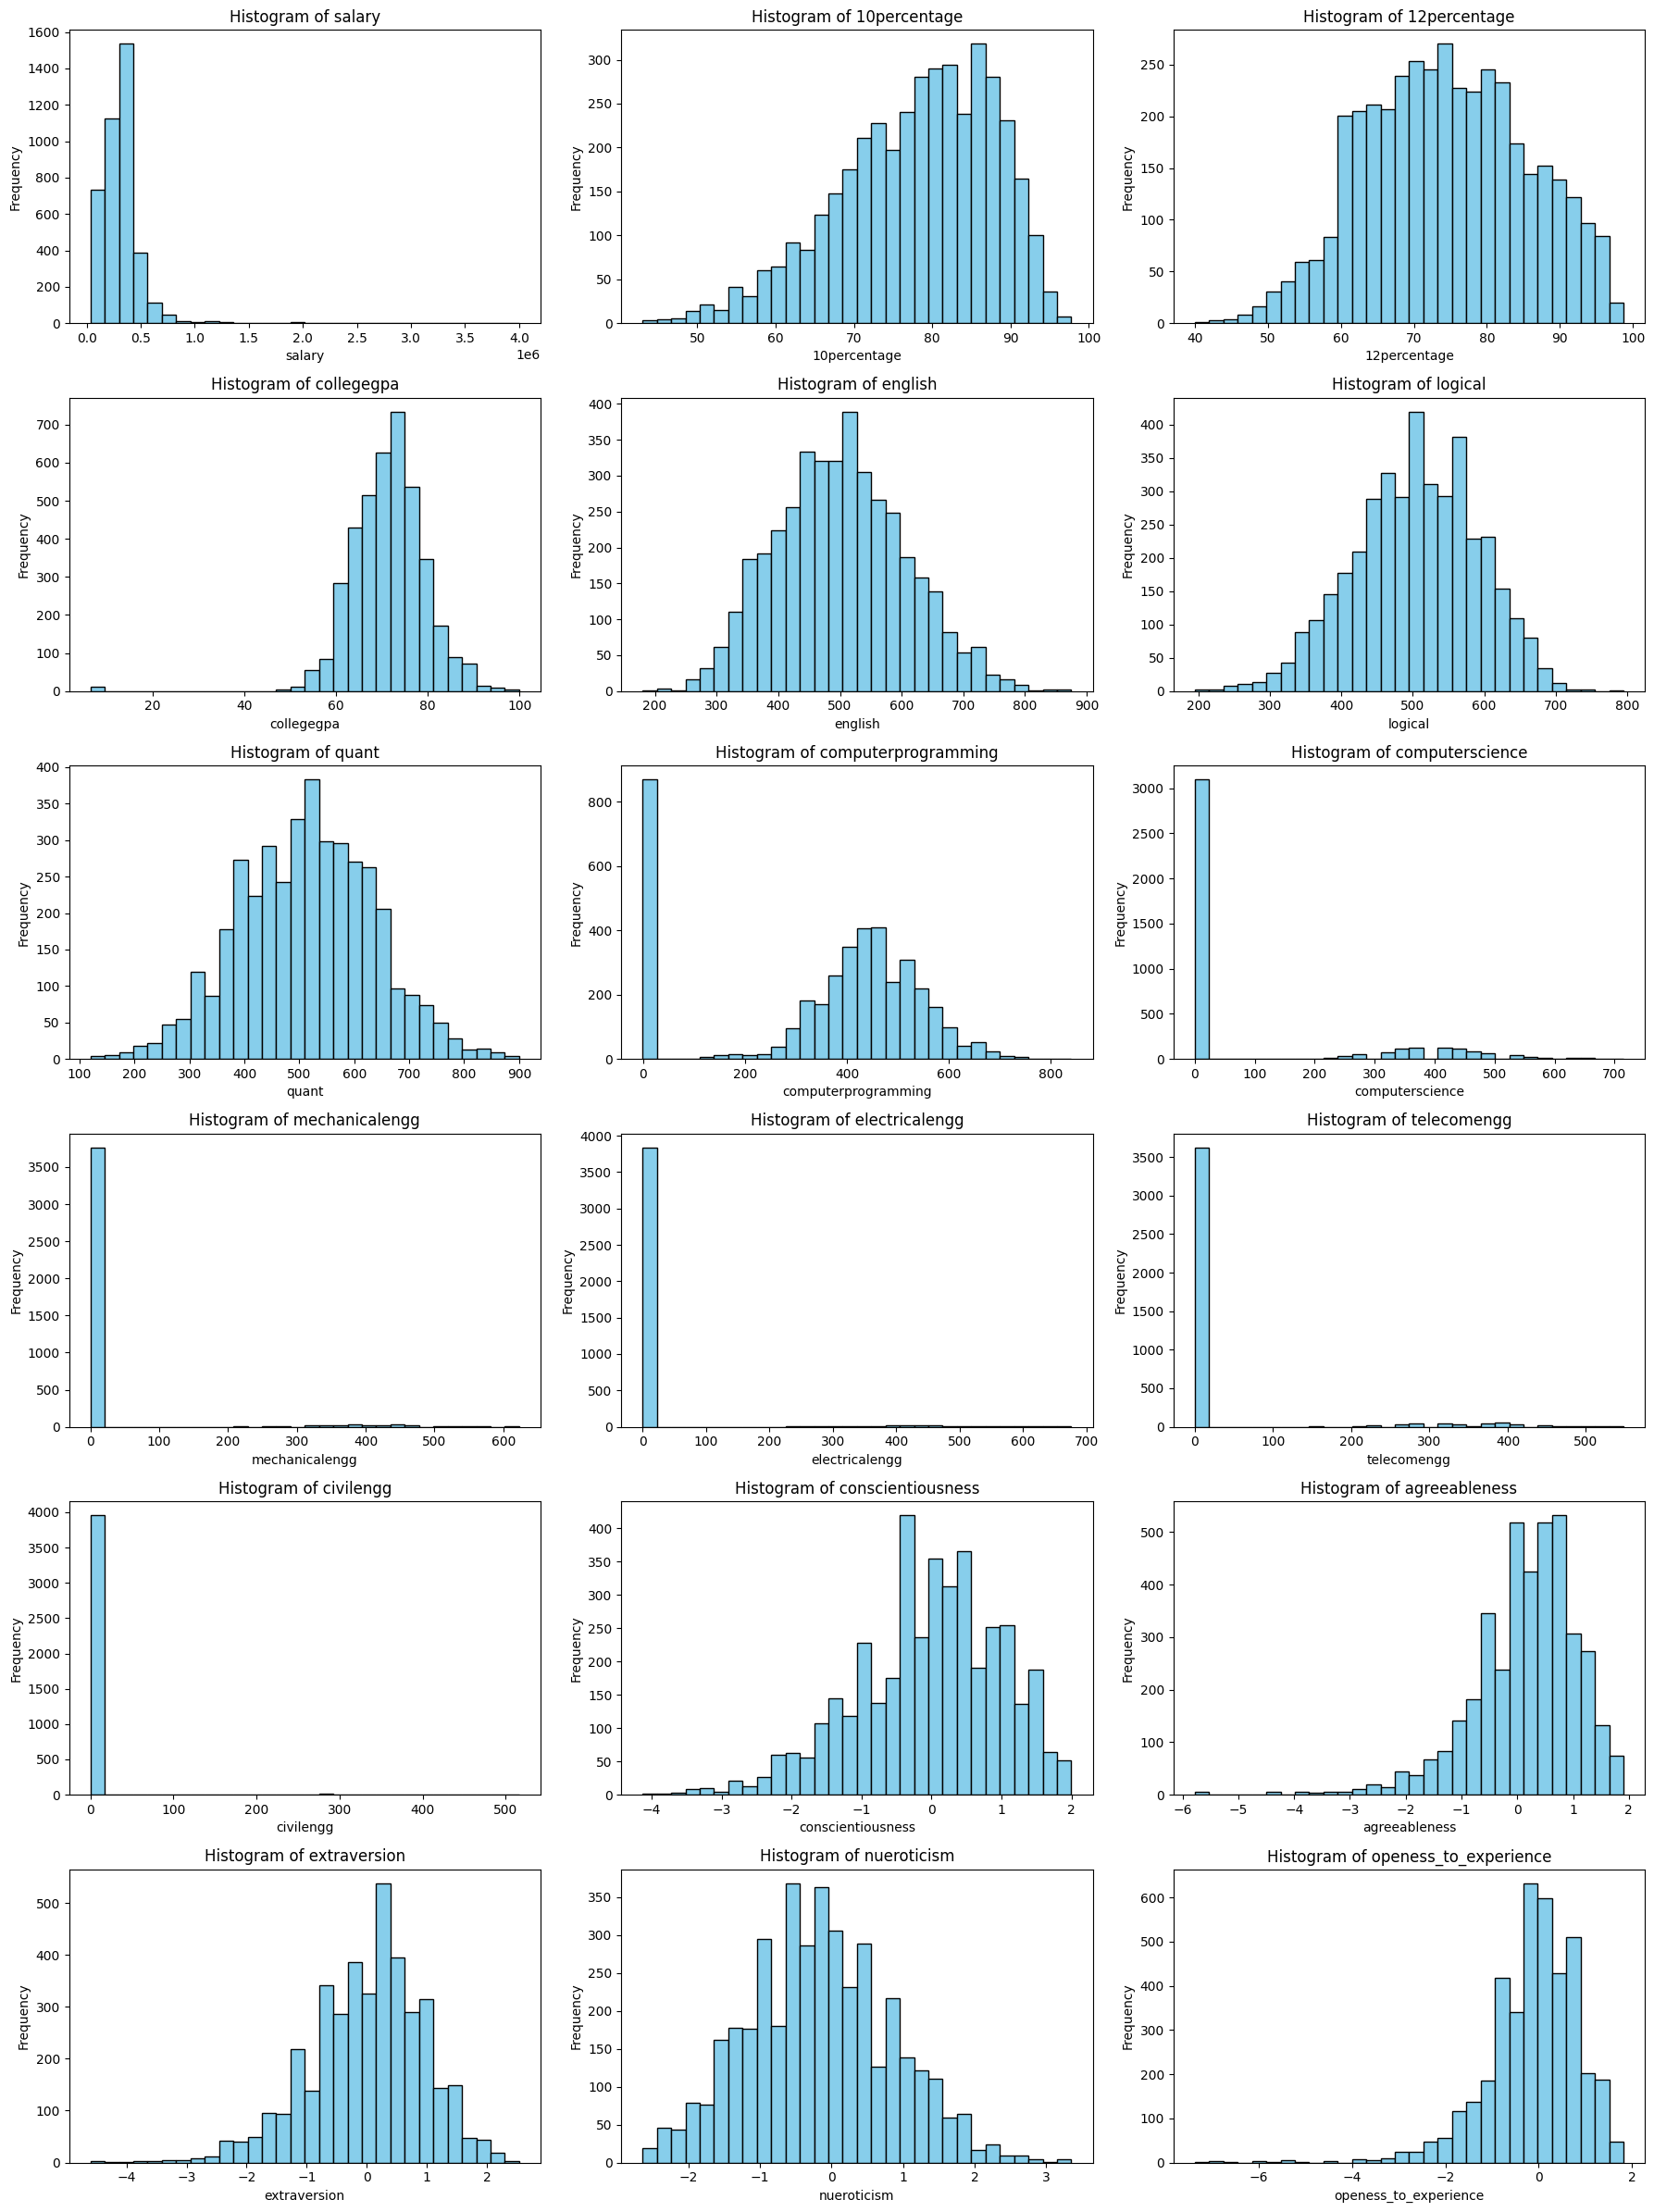

In [61]:
# Select the columns you want to plot
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
                   'english', 'logical', 'quant', 'computerprogramming',
                   'computerscience', 'mechanicalengg', 'electricalengg',
                   'telecomengg', 'civilengg', 'conscientiousness',
                   'agreeableness', 'extraversion', 'nueroticism',
                   'openess_to_experience']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(18, 24))  # 6 rows, 3 columns layout
axes = axes.flatten()  # Flatten the 2D array of axes into 1D for easier iteration

# Loop through each column and its respective axis
for i, column in enumerate(columns_to_plot):
    axes[i].hist(df[column].dropna(), bins=30, color='skyblue', edgecolor='black')  # Plot histogram
    axes[i].set_title(f'Histogram of {column}')  # Set title for each subplot
    axes[i].set_xlabel(column)  # X-axis label
    axes[i].set_ylabel('Frequency')  # Y-axis label

# Remove any unused subplots (if there are more axes than columns)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()


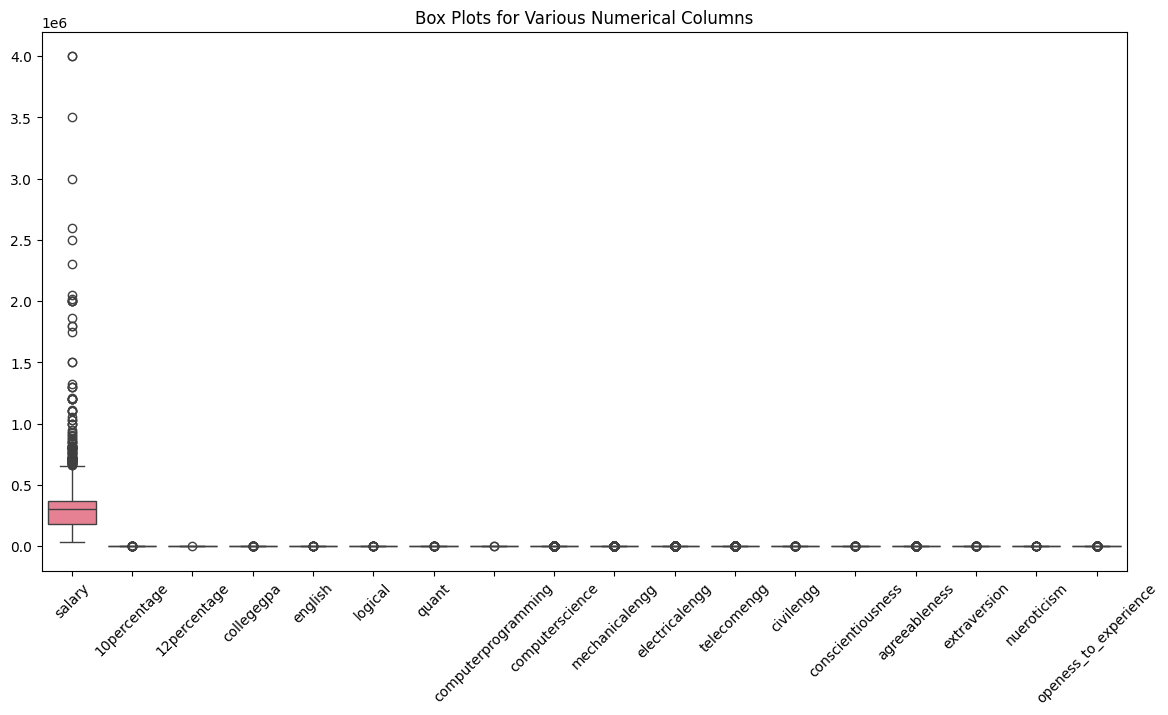

In [62]:
# Correct list of columns to plot (only numerical columns)
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
'english', 'logical', 'quant', 'computerprogramming',
'computerscience', 'mechanicalengg', 'electricalengg',
'telecomengg', 'civilengg', 'conscientiousness',
'agreeableness', 'extraversion', 'nueroticism',
'openess_to_experience']
# Plot the box plot with valid columns
plt.figure(figsize=(14, 7))
sns.boxplot(data=df[columns_to_plot])
plt.title('Box Plots for Various Numerical Columns')
plt.xticks(rotation=45)
plt.show()


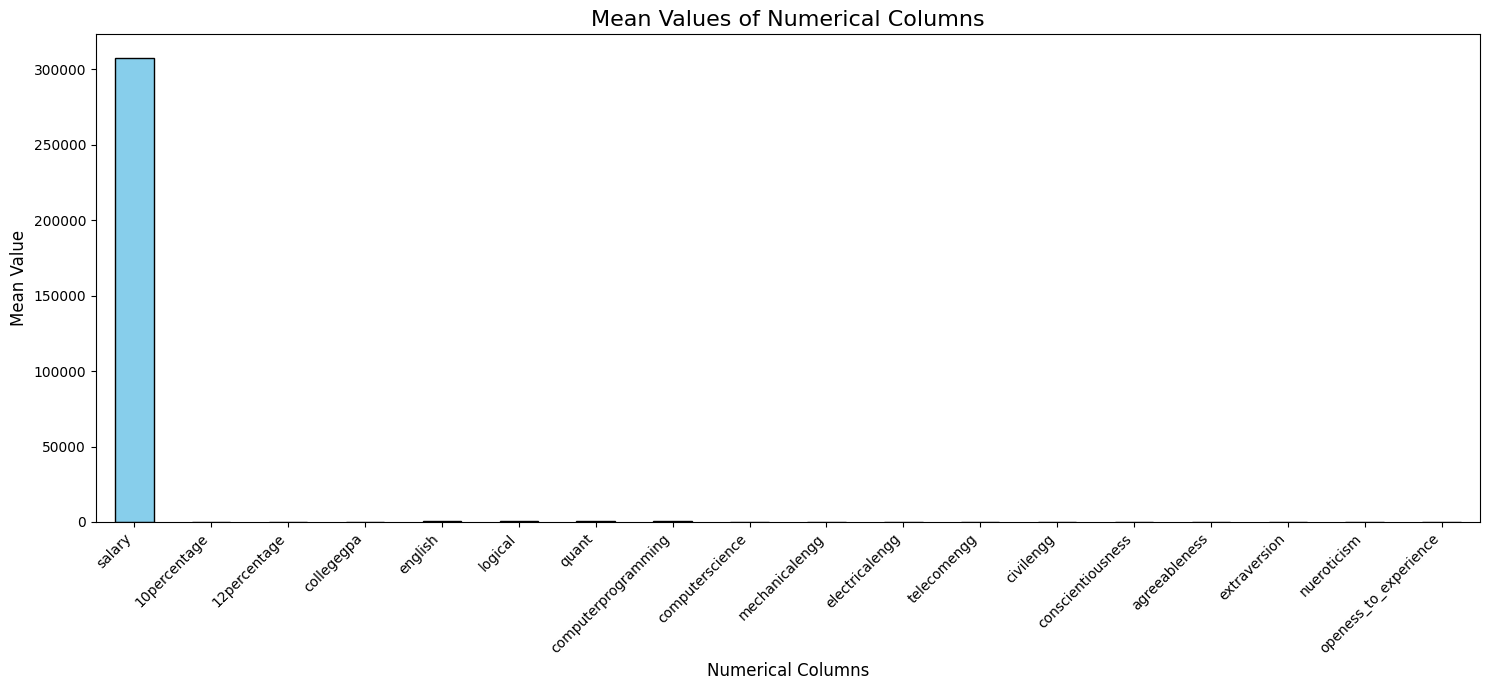

In [64]:
import matplotlib.pyplot as plt

# Select only numerical columns
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
                   'english', 'logical', 'quant', 'computerprogramming',
                   'computerscience', 'mechanicalengg', 'electricalengg',
                   'telecomengg', 'civilengg', 'conscientiousness',
                   'agreeableness', 'extraversion', 'nueroticism',
                   'openess_to_experience']

# Calculate the mean of each numerical column
mean_values = df[columns_to_plot].mean()

# Create the bar plot
plt.figure(figsize=(15, 7))  # Set the figure size
mean_values.plot(kind='bar', color='skyblue', edgecolor='black')

# Customize the plot
plt.title('Mean Values of Numerical Columns', fontsize=16)
plt.xlabel('Numerical Columns', fontsize=12)
plt.ylabel('Mean Value', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better visibility

# Show the plot
plt.tight_layout()
plt.show()


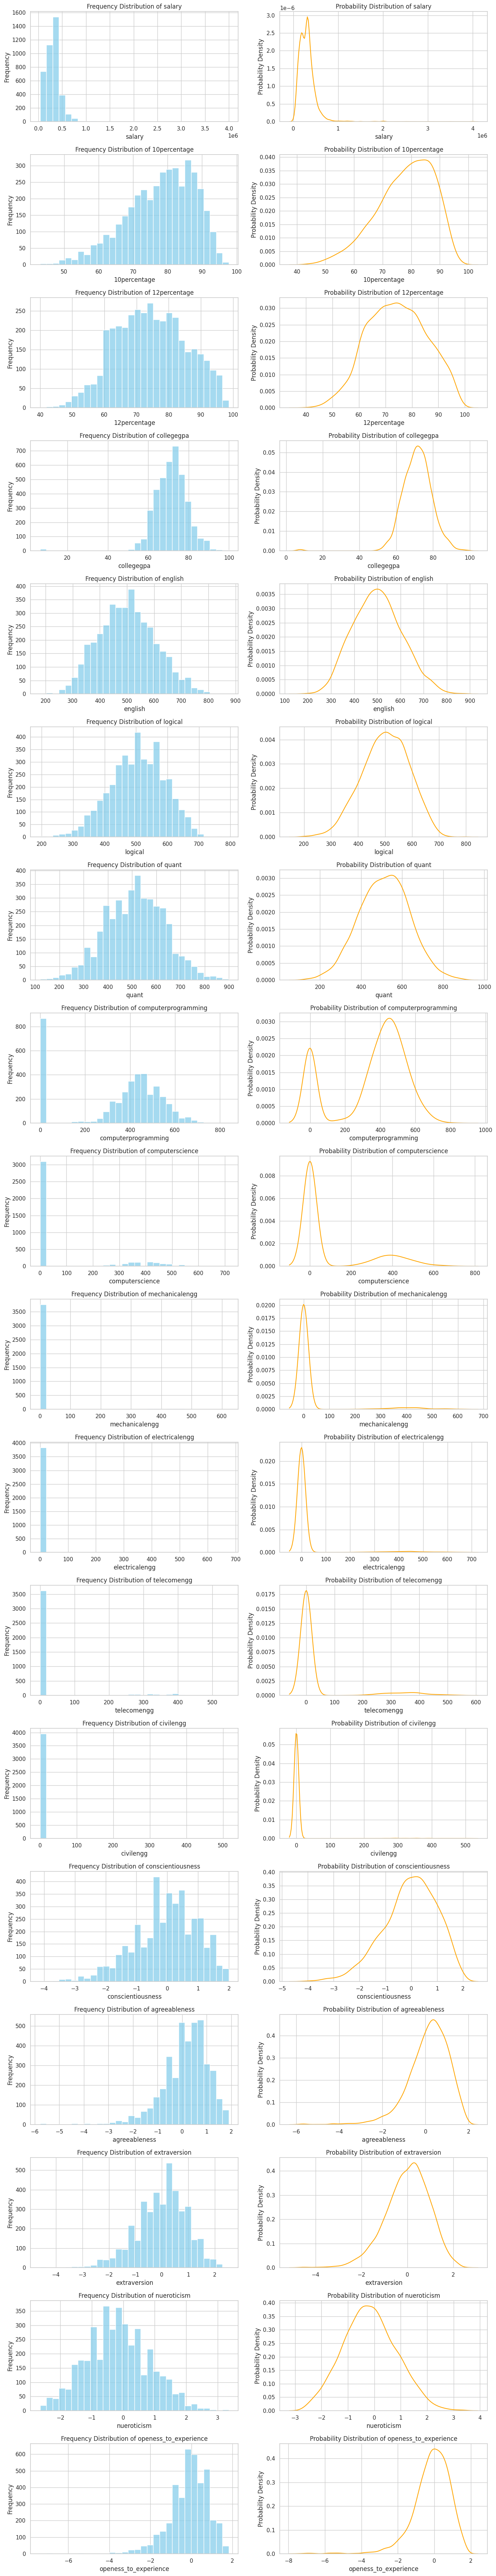

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Define the columns for plotting
columns_to_plot = ['salary', '10percentage', '12percentage', 'collegegpa',
                   'english', 'logical', 'quant', 'computerprogramming',
                   'computerscience', 'mechanicalengg', 'electricalengg',
                   'telecomengg', 'civilengg', 'conscientiousness',
                   'agreeableness', 'extraversion', 'nueroticism',
                   'openess_to_experience']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=2, figsize=(14, len(columns_to_plot) * 4))

# Loop through each numerical column to plot
for i, column in enumerate(columns_to_plot):
    # Frequency Distribution
    sns.histplot(df[column], ax=axes[i, 0], bins=30, kde=False, color='skyblue')
    axes[i, 0].set_title(f'Frequency Distribution of {column}', fontsize=12)
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')

    # Probability Distribution (KDE)
    sns.kdeplot(df[column], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'Probability Distribution of {column}', fontsize=12)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Probability Density')

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='gender', ylabel='count'>

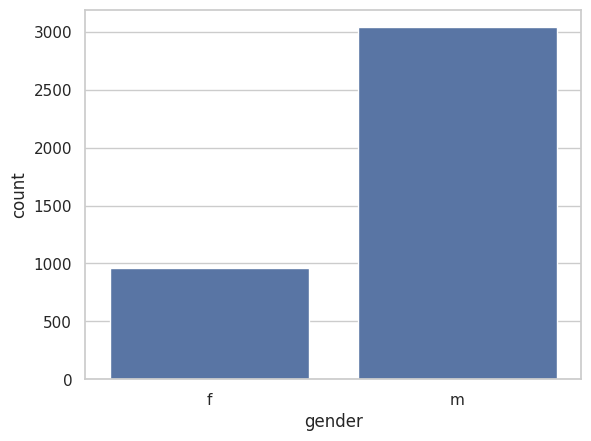

In [67]:
sns.countplot(x=df['gender'])

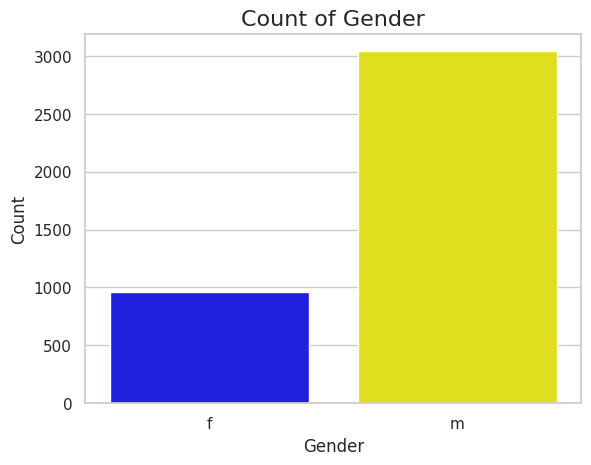

In [68]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a color palette where female is blue and male is yellow
colors = ['blue', 'yellow']

# Create the countplot and map the colors manually
sns.countplot(x='gender', data=df, palette=colors)

# Customize the plot
plt.title('Count of Gender', fontsize=16)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Show the plot
plt.show()


In [69]:
df.columns

Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

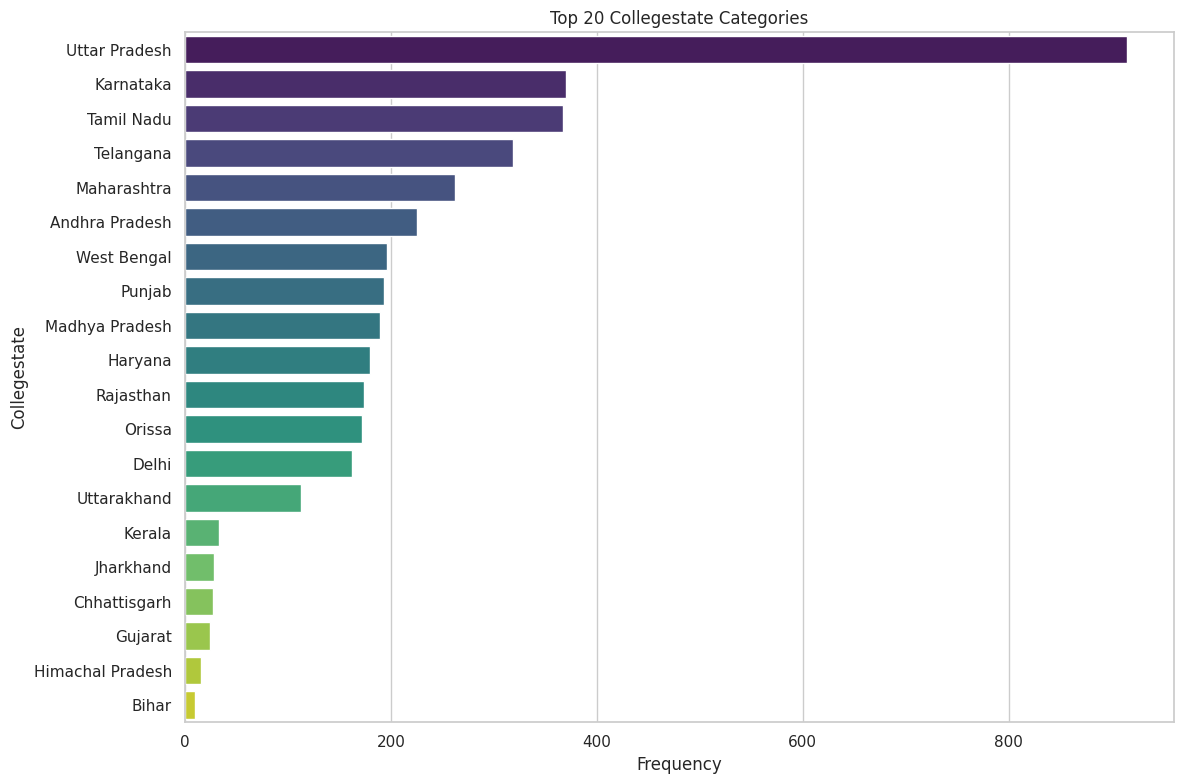

In [71]:
top_collegestates = df['collegestate'].value_counts().nlargest(20)

plt.figure(figsize=(12, 8))
sns.countplot(y='collegestate',
              data=df[df['collegestate'].isin(top_collegestates.index)],
              palette='viridis', order=top_collegestates.index)

plt.title('Top 20 Collegestate Categories')
plt.xlabel('Frequency')
plt.ylabel('Collegestate')

plt.tight_layout()
plt.show()


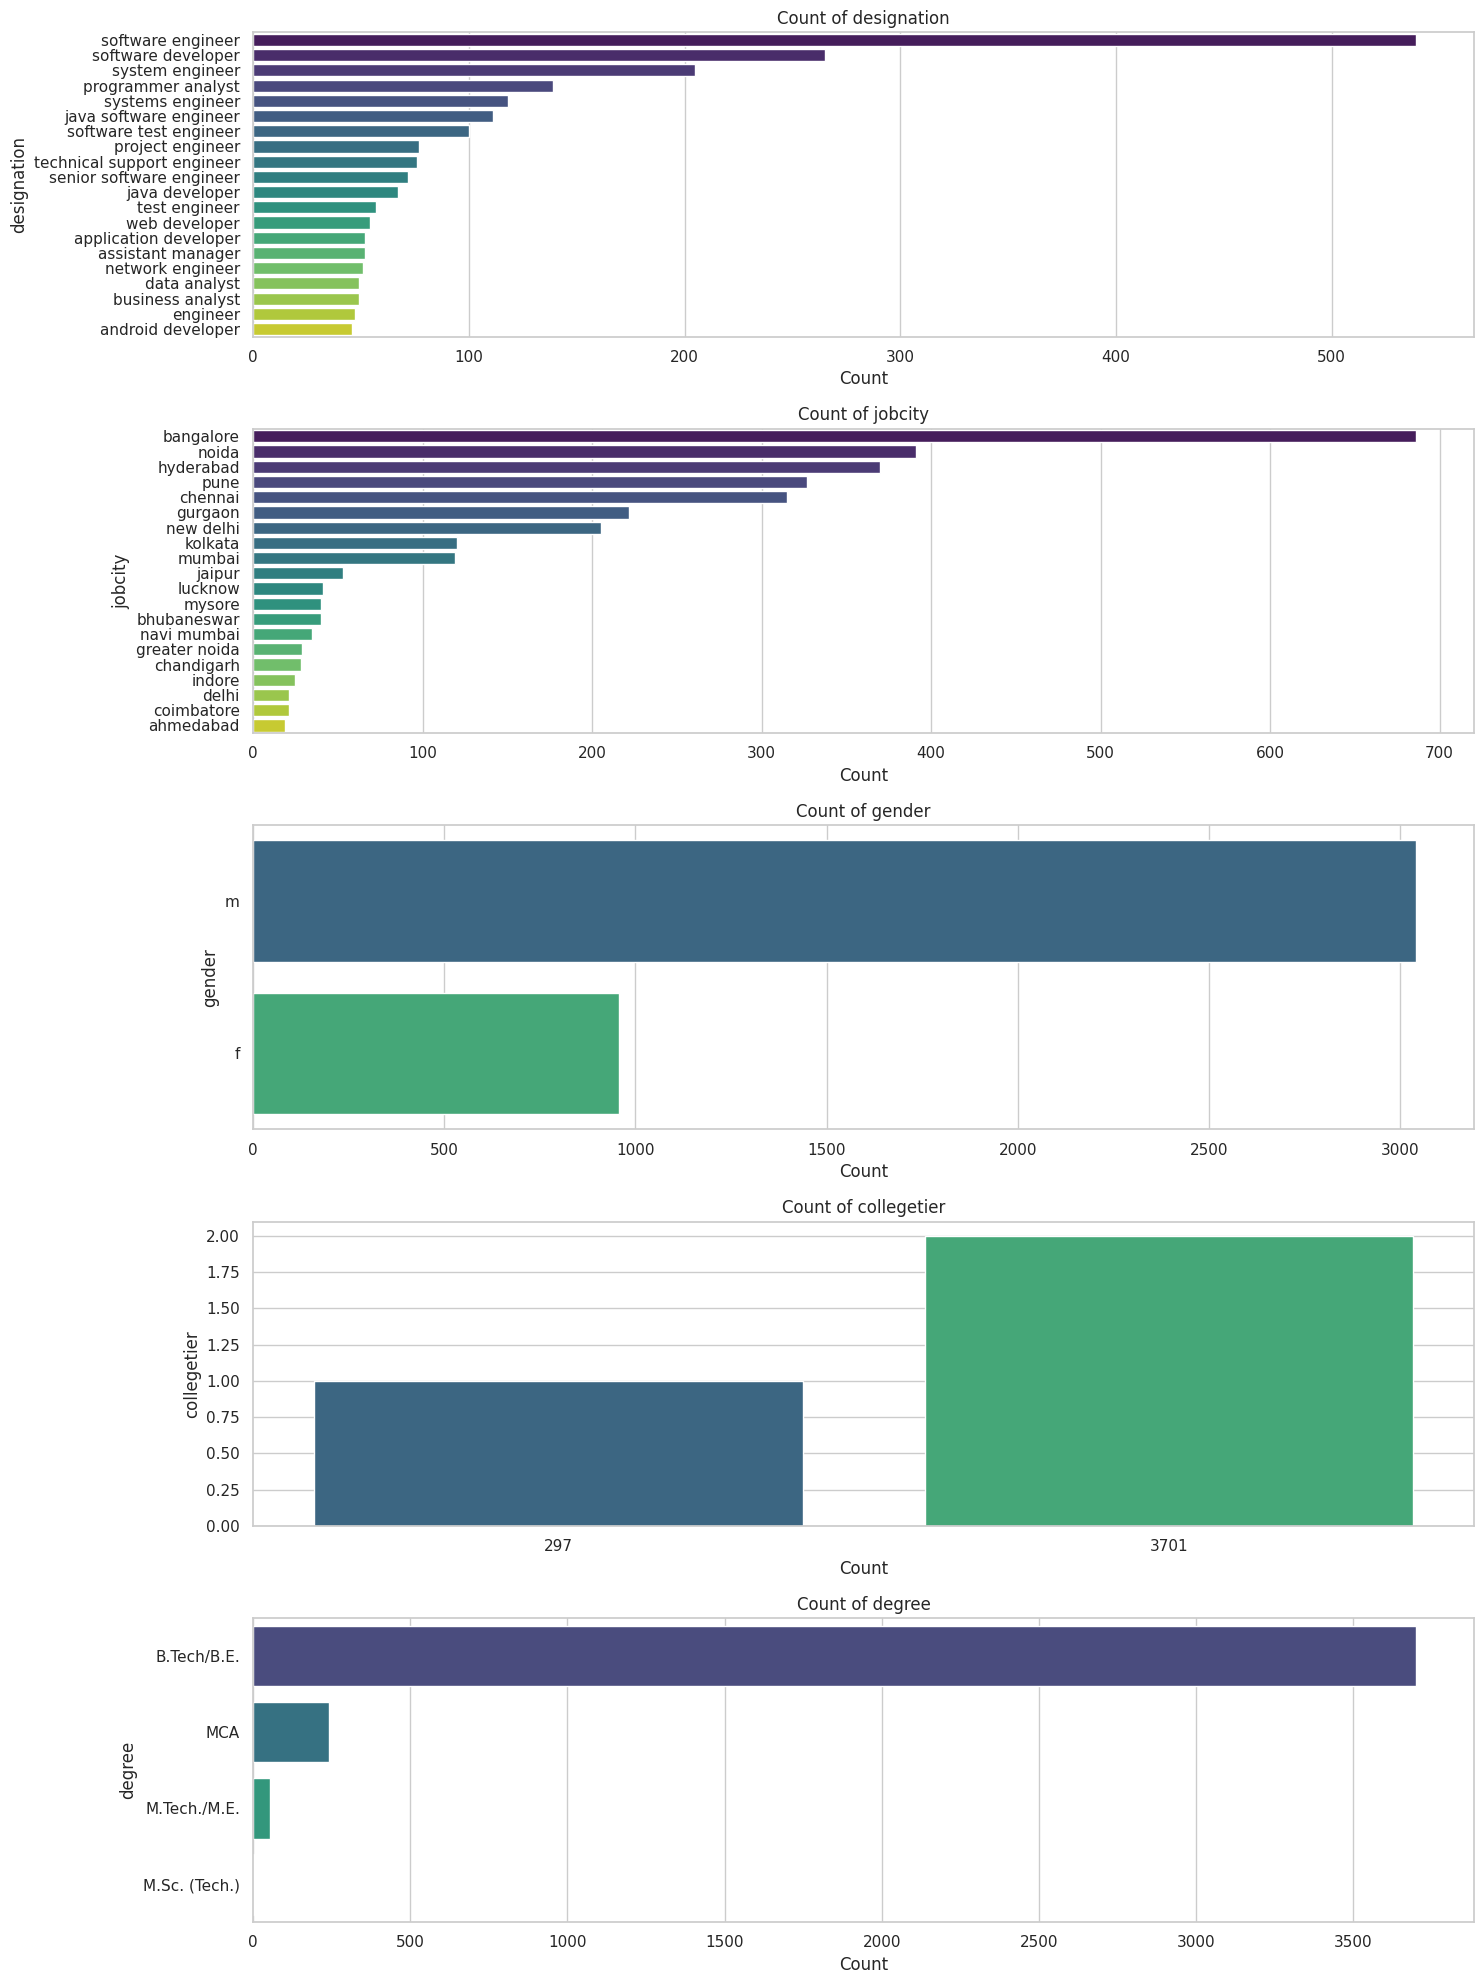

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# List of important categorical columns
important_categorical_columns = ['designation', 'jobcity', 'gender', 'collegetier', 'degree']

# Create a bar plot for each important categorical column
plt.figure(figsize=(15, 20))  # Adjust the figure size as needed

for i, column in enumerate(important_categorical_columns):
    plt.subplot(len(important_categorical_columns), 1, i + 1)  # Create a subplot for each column
    top_values = df[column].value_counts().nlargest(20)  # Get top 20 values
    sns.barplot(x=top_values.values, y=top_values.index, palette='viridis')  # Horizontal bar plot
    plt.title(f'Count of {column}')  # Set the title
    plt.xlabel('Count')  # Label for x-axis
    plt.ylabel(column)  # Label for y-axis

plt.tight_layout()  # Adjust layout to prevent clipping of tick-labels
plt.show()


#2 Bivariate Analysis

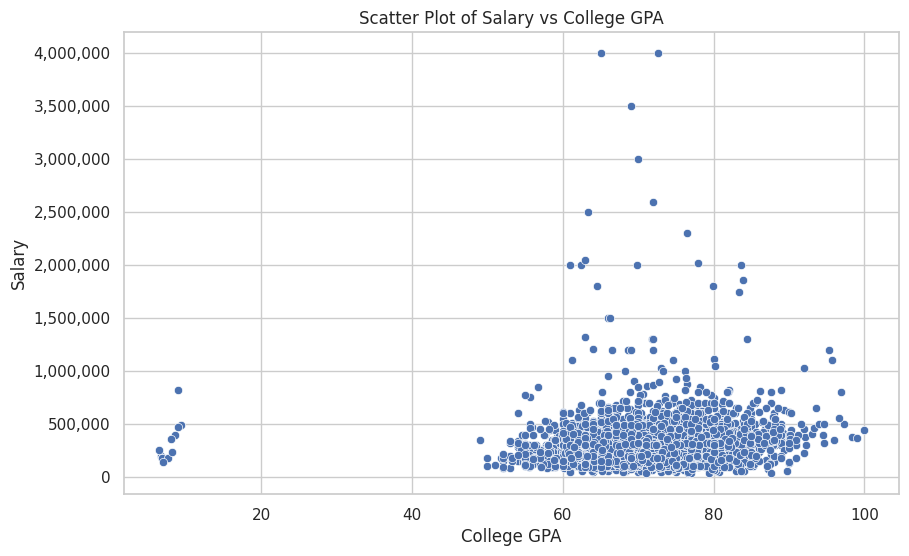

In [77]:
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import seaborn as sns

# Function to format y-axis labels
def currency(x, _):
    return f'{int(x):,}'  # Format as integer with commas

plt.figure(figsize=(10, 6))

# Create the scatter plot
sns.scatterplot(data=df, x='collegegpa', y='salary')

# Set the title and labels
plt.title('Scatter Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')

# Enable grid
plt.grid(True)

# Apply the formatter to the y-axis
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))

# Show the plot
plt.show()


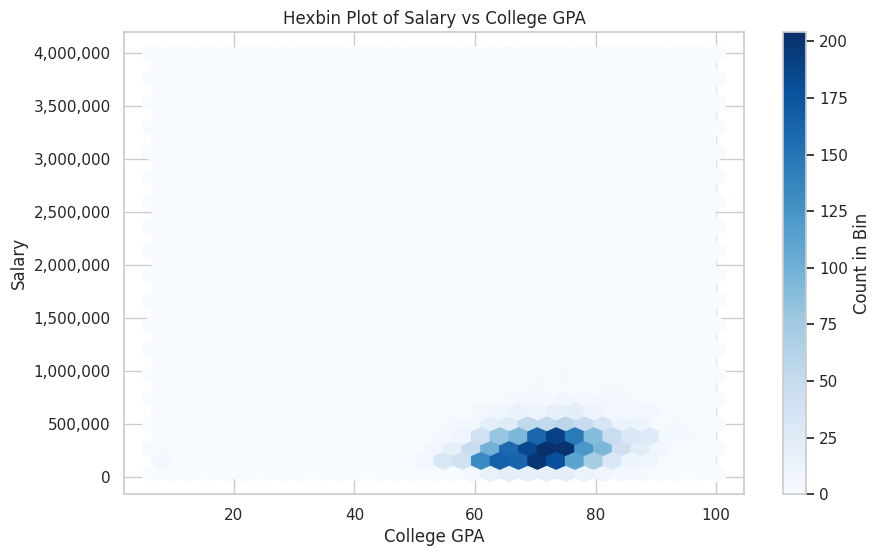

In [78]:
plt.figure(figsize=(10, 6))
plt.hexbin(df['collegegpa'], df['salary'], gridsize=30, cmap='Blues')
plt.colorbar(label='Count in Bin')
plt.title('Hexbin Plot of Salary vs College GPA')
plt.xlabel('College GPA')
plt.ylabel('Salary')
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


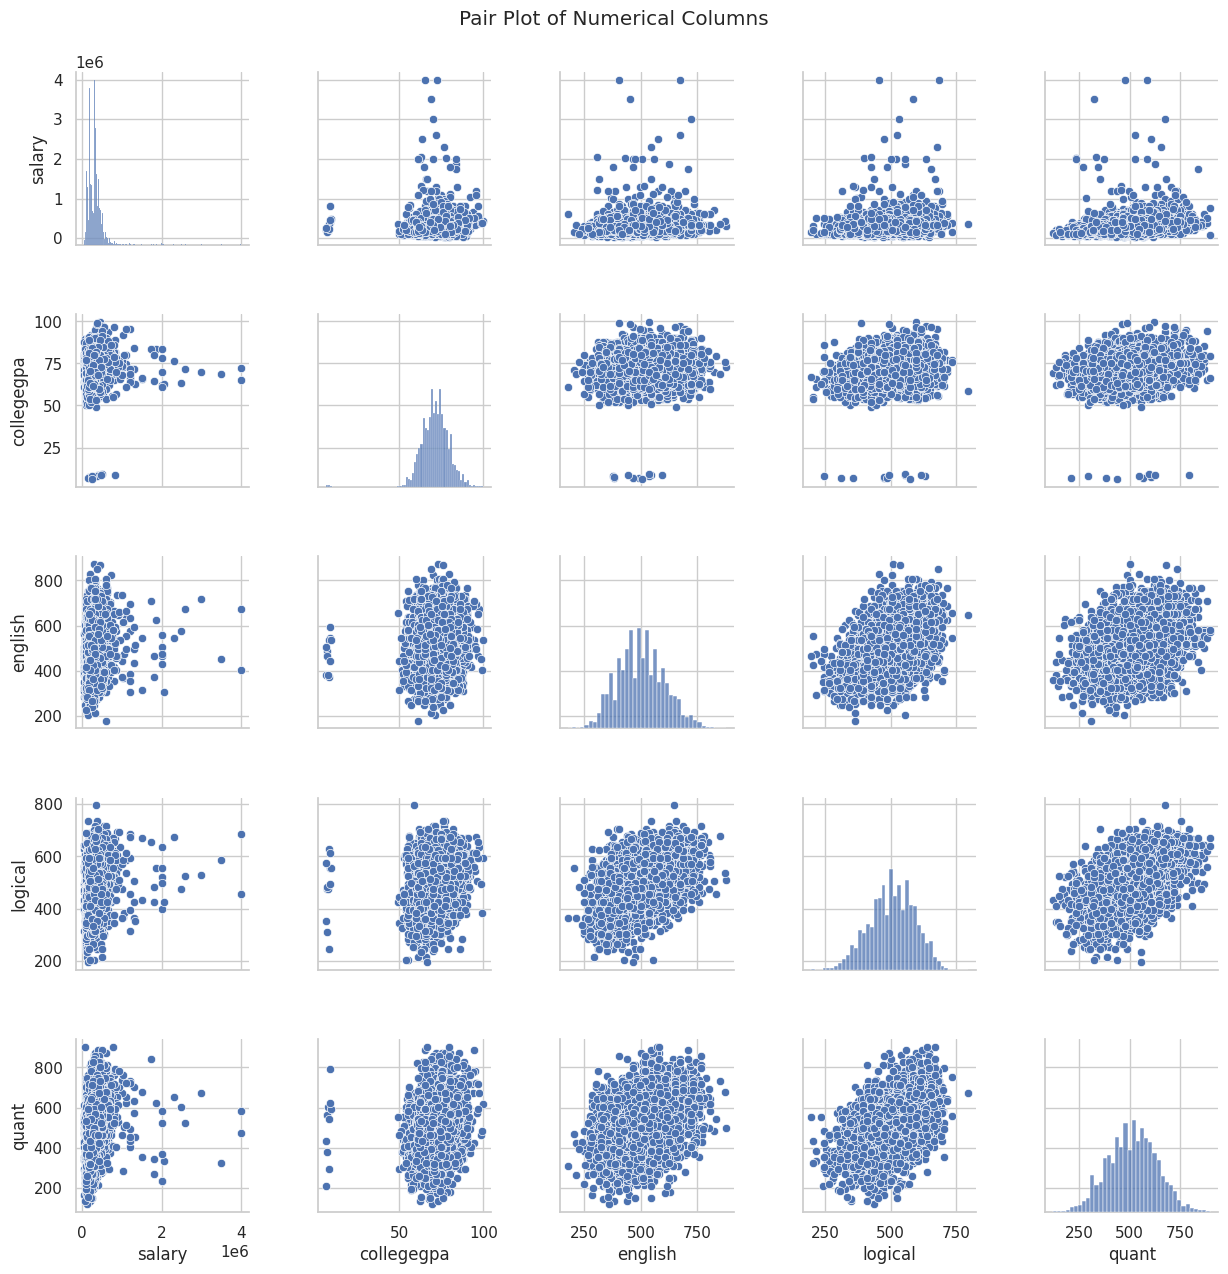

In [80]:
numerical_columns = ['salary', 'collegegpa', 'english', 'logical', 'quant']
sns.set(style="whitegrid")
pair_plot = sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


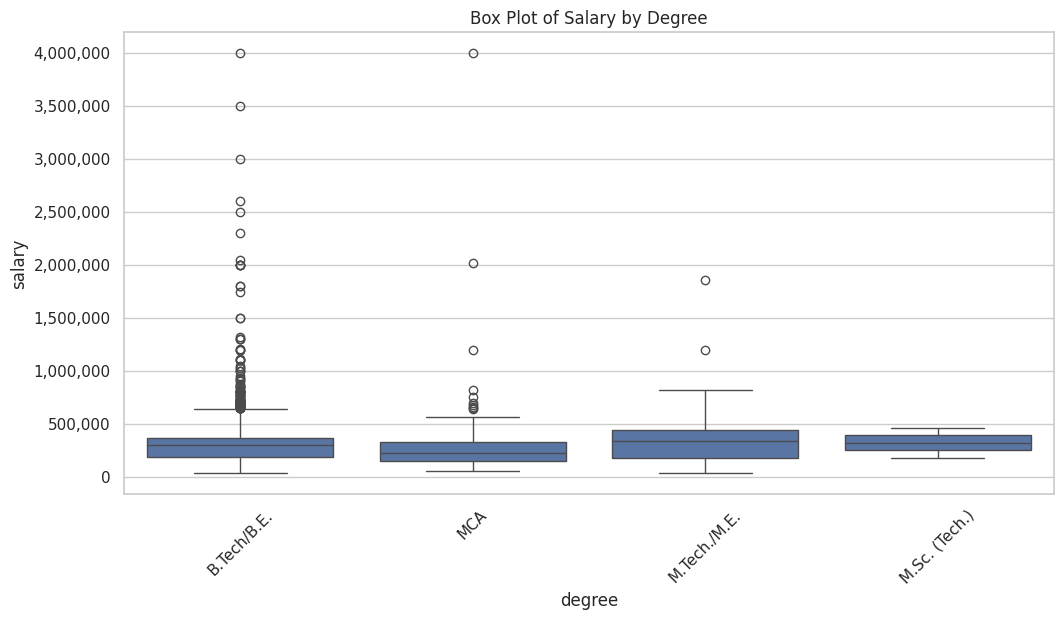

In [81]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='degree', y='salary')
plt.title('Box Plot of Salary by Degree')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


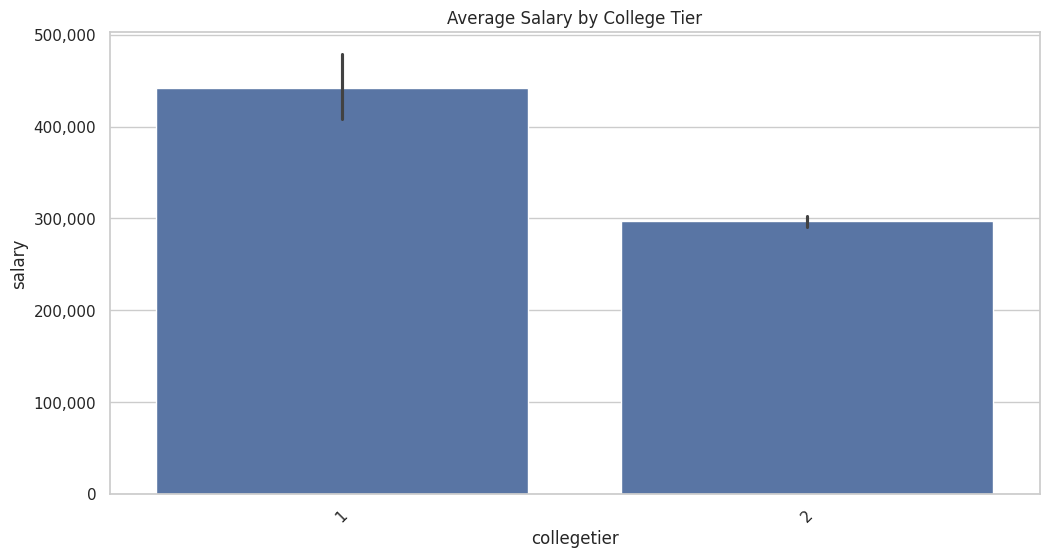

In [82]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='collegetier', y='salary', estimator=np.mean)
plt.title('Average Salary by College Tier')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(currency))
plt.show()


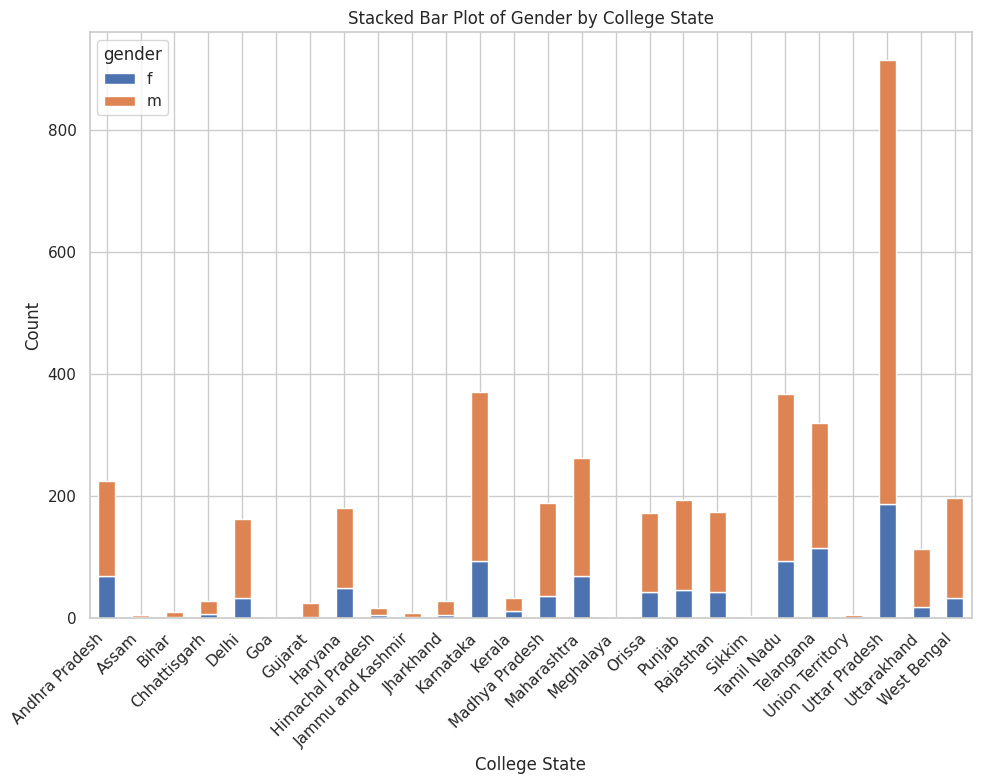

In [83]:
pivot_table = df.pivot_table(index='collegestate', columns='gender',values='salary', aggfunc='count').fillna(0)
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 8))
plt.title('Stacked Bar Plot of Gender by College State')
plt.xlabel('College State')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Adjusted alignment to 'right'
plt.tight_layout() # Adjust layout to prevent clipping
plt.show()


In [84]:
df.columns


Index(['id', 'salary', 'doj', 'dol', 'designation', 'jobcity', 'gender', 'dob',
       '10percentage', '10board', '12graduation', '12percentage', '12board',
       'collegeid', 'collegetier', 'degree', 'specialization', 'collegegpa',
       'collegecityid', 'collegecitytier', 'collegestate', 'graduationyear',
       'english', 'logical', 'quant', 'domain', 'computerprogramming',
       'electronicsandsemicon', 'computerscience', 'mechanicalengg',
       'electricalengg', 'telecomengg', 'civilengg', 'conscientiousness',
       'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience'],
      dtype='object')

In [86]:
from scipy import stats

# Specify the claimed salary range
lower_bound = 2.5 * 100000  # converting lakhs to actual number
upper_bound = 3 * 100000

# Filter data for specified job titles
job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer', 'Associate Engineer']
filtered_data = df[df['designation'].isin(job_titles)]

# Perform one-sample t-test on salary
if not filtered_data.empty:
    t_statistic, p_value = stats.ttest_1samp(filtered_data['salary'], lower_bound)

    # Display the results
    print(f"T-statistic: {t_statistic}, P-value: {p_value}")

    # Interpret the p-value
    alpha = 0.05
    if p_value < alpha:
        print("Reject the null hypothesis: Average salary significantly differs from the claimed range.")
    else:
        print("Fail to reject the null hypothesis: Average salary does not significantly differ from the claimed range.")
else:
    print("No data found for the specified job titles.")


No data found for the specified job titles.


In [87]:
# Assuming df is your DataFrame containing the data
job_titles = ['Programming Analyst', 'Software Engineer', 'Hardware Engineer','Associate Engineer']
salary_data = df[df['designation'].isin(job_titles)]
# Calculate the average salary for each job title
average_salaries = salary_data.groupby('designation')['salary'].mean().reset_index()
# Check if average salaries are within the claimed range of 2.5 to 3 Lakhs
average_salaries['within_claimed_range'] = average_salaries['salary'].apply(lambda x: 2.5 <= x <= 3)
print("Average Salaries for Specified Job Titles:")
print(average_salaries)
print("\nAverage Salaries within Claimed Range:")
print(average_salaries[average_salaries['within_claimed_range']])

Average Salaries for Specified Job Titles:
Empty DataFrame
Columns: [designation, salary, within_claimed_range]
Index: []

Average Salaries within Claimed Range:
Empty DataFrame
Columns: []
Index: []


In [89]:
# Create a contingency table
contingency_table = pd.crosstab(df['gender'], df['specialization'])

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Create a results DataFrame with reset index
results = pd.DataFrame({
    'Metric': ['Chi-Squared Statistic', 'P-value', 'Degrees of Freedom', 'Conclusion'],
    'Value': [
        chi2_stat,
        p_value,
        dof,
        "Reject the null hypothesis" if p_value < 0.05 else "Fail to reject the null hypothesis"
    ]
})

# Reset the index of the results DataFrame
results.reset_index(drop=True, inplace=True)

# Display the results
print("\nChi-Square Test Results:")
print(results)


Contingency Table:
specialization  aeronautical engineering  \
gender                                     
f                                      1   
m                                      2   

specialization  applied electronics and instrumentation  \
gender                                                    
f                                                     2   
m                                                     7   

specialization  automobile/automotive engineering  biomedical engineering  \
gender                                                                      
f                                               0                       2   
m                                               5                       0   

specialization  biotechnology  ceramic engineering  chemical engineering  \
gender                                                                     
f                           9                    0                     1   
m                           6 

#Conclusion from Exploratory Data Analysis (EDA)
**Salary Overview:** The analysis revealed that the salary distribution is highly right-skewed, indicating that while most salaries cluster around lower values, there are significant outliers with very high salaries. This suggests that a small number of employees command much higher pay, influencing the average salary.

**Key Features:** Various factors appear to impact salary levels, including:

**Academic Performance:** Higher percentages in 10th and 12th grades, along with a higher college GPA, are generally associated with higher salaries. This underscores the importance of academic achievement in determining job compensation.
Designation: The type of job title significantly influences salary, with specialized roles such as "Software Engineer" and "Hardware Engineer" often commanding higher salaries compared to other designations.
**Geographic Location:** Job city and college state might also play a role in salary variations, as salaries can differ based on the local cost of living and demand for specific skill sets.
Personality Traits: The correlation between salary and personality traits such as conscientiousness, agreeableness, and extraversion could offer insights into the workplace dynamics and how certain traits might lead to better performance and, consequently, higher salaries.

**Missing Data:** The Date of Leaving (DOL) column has a considerable number of missing values, indicating that many employees are still employed. This could skew any temporal analyses related to job tenure and salary progression.

**Future Directions:** The findings suggest the potential for deeper analyses, such as regression modeling to quantify the impact of these features on salary or conducting hypothesis tests to compare salaries across different groups. Addressing the missing values in the DOL column might also improve insights regarding employee retention and turnover.

